In [10]:
import pandas as pd
import re
import numpy as np
import textstat
from textblob import TextBlob

C:\Users\youxi\anaconda3\envs\bar\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Preprocessed the data

In [3]:
df=pd.read_excel('kickstarter1023.xlsx')
df.head()

,ProjectID,Subcategories,URL,State,ProjectName,ProjectDescription,CreatorName,LastUpdate,UpdateCount,CommentCount,...,CreatorLocation,LastLogin,CreatorURL,Connect,Biography,backed,joined,create,Category,webNum
0,1,3D Printing,https://www.kickstarter.com/projects/3dprinter...,live,Halloween Spooktacular STL Bundle for 3D Printing,100+ 3D Printable Designs for a Haunting Hallo...,3D Printer Academy,NaT,1.0,23.0,...,"Ithaca, NY",2023-09-09,https://www.kickstarter.com/profile/3dprintera...,False,Backer Favorite\n\n\n\nExplore and Download un...,7.0,2020-05-16,17.0,Technology,1
1,2,3D Printing,https://www.kickstarter.com/projects/3dpprofes...,successful,PrintABlok:BattleMecha - Kitbash Toys for 3D P...,"PrintABlok, the toy of the future, is going Ro...",Joe Larson,2023-09-15,9.0,4.0,...,"Hurricane, UT",2023-09-14,https://www.kickstarter.com/profile/3dpprofess...,True,"Backer Favorite\n\n\n\nYouTuber, Award winning...",25.0,2011-04-12,25.0,Technology,1
2,3,3D Printing,https://www.kickstarter.com/projects/snapmaker...,successful,Snapmaker 2.0: Modular 3-in-1 3D Printers,Unlock your full creative potential from 3D pr...,Snapmaker,2023-06-29,26.0,5611.0,...,"Shenzhen, China",2023-08-29,https://www.kickstarter.com/profile/snapmaker/...,False,Backer Favorite\n\n\n\nSnapmaker is a tech sta...,2.0,2017-02-13,2.0,Technology,1
3,4,3D Printing,https://www.kickstarter.com/projects/126044585...,successful,Automatic Rubber Band Blaster Kit!,History trembled the day the Rubber Band Blast...,Dorhout R&D LLC,2015-04-06,19.0,42.0,...,"Santa Clara, CA",2021-03-07,https://www.kickstarter.com/profile/1260445854...,True,2-time creator\n\n\n\nShuttle Bay Labs (a divi...,11.0,2012-09-19,2.0,Technology,2
4,5,3D Printing,https://www.kickstarter.com/projects/logxen/sm...,successful,Smoothieboard - The future of CNC motion control,Easy to use open source G-code interpreter for...,"Uberclock, LLC",2019-09-07,20.0,241.0,...,"Gold Hill, OR",2022-05-21,https://www.kickstarter.com/profile/logxen/about,True,"Creator\n\n\n\nUberclock, LLC was founded by M...",19.0,2012-11-15,1.0,Technology,4


In [4]:
df.describe()

,ProjectID,UpdateCount,CommentCount,Pledged,Goal,ImgCount,videoCount,youtubeCount,Backer,Days,backed,create,webNum
count,88593.000000,88355.000000,87574.000000,8.755100e+04,8.757400e+04,88593.000000,88593.000000,88593.000000,87551.000000,86630.000000,85446.000000,85143.000000,88593.000000
mean,44857.627217,8.435391,181.718444,3.881281e+04,5.920698e+04,14.932760,1.065062,0.405077,374.519491,64.268233,21.444117,15.350070,1.439595
std,25831.395567,14.441899,2064.835080,2.540580e+05,1.082875e+06,17.653301,1.328856,1.416702,2115.270388,98.201962,77.736393,70.835308,1.477821
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,22568.000000,0.000000,0.000000,1.530000e+02,3.000000e+03,2.000000,1.000000,0.000000,5.000000,30.000000,0.000000,1.000000,0.000000
50%,44995.000000,3.000000,2.000000,1.829000e+03,1.000000e+04,9.000000,1.000000,0.000000,31.000000,30.000000,1.000000,1.000000,1.000000
75%,67242.000000,11.000000,27.000000,1.138150e+04,2.500000e+04,21.000000,1.000000,0.000000,162.000000,45.000000,10.000000,4.000000,2.000000
max,89512.000000,349.000000,220719.000000,2.033899e+07,1.000000e+08,322.000000,127.000000,45.000000,219382.000000,900.000000,1608.000000,1608.000000,20.000000


In [5]:
# Replace 'Unsuccessful' with 'failed' in the 'State' column
df['State'] = df['State'].replace('unsuccessful', 'failed')
# Create a list of columns to consider for duplicate check
columns_to_check = [col for col in df.columns if col not in ['ProjectID', 'URL','CreatorURL']]

# Remove duplicate rows based on these columns
df = df.drop_duplicates(subset=columns_to_check)

Frequency of each state:
failed        40314
successful    33358
canceled      10808
upcoming       1019
live            855
suspended         3
Name: State, dtype: int64
Total: 86357


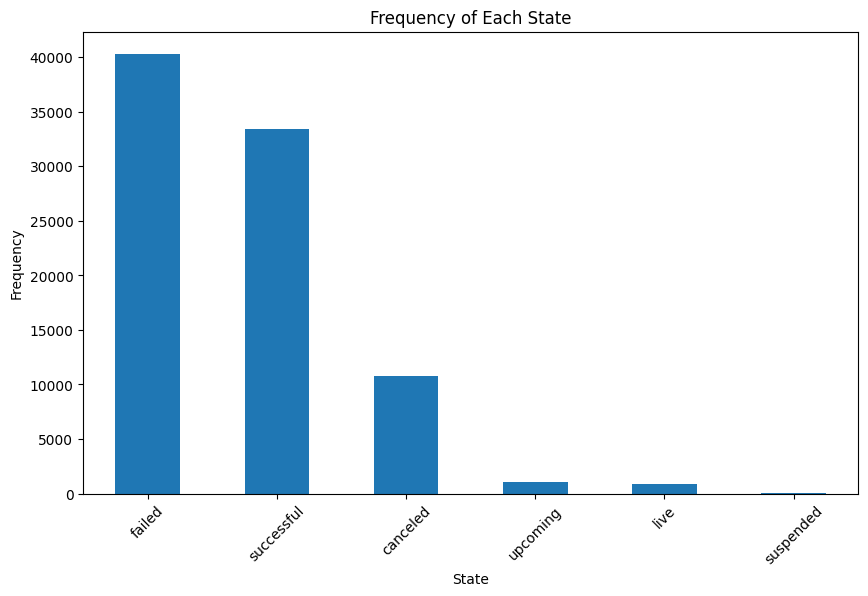

In [6]:
#Frequency of the State
state_counts = df['State'].value_counts()
print("Frequency of each state:")
print(state_counts)
print(f'Total: {len(df)}')
# Plotting
import matplotlib.pyplot as plt
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Each State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency of each Category:
Games         39372
Technology    23797
Design        23184
Name: Category, dtype: int64
Total: 86357


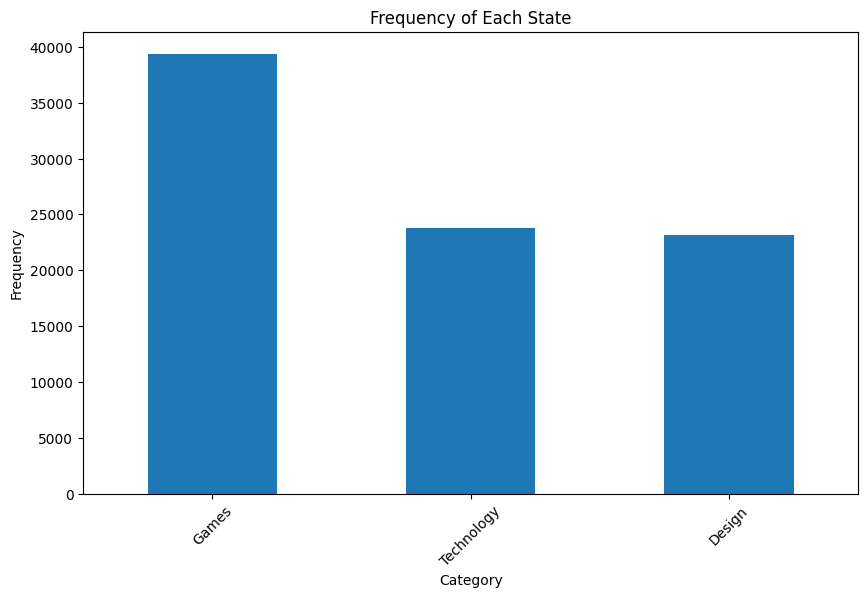

In [7]:
#frequcey of each category
state_counts = df['Category'].value_counts()
print("Frequency of each Category:")
print(state_counts)
print(f'Total: {len(df)}')
# Plotting
import matplotlib.pyplot as plt
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Each State')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Generated columns named Education_Context(the Educaitonal Context form Biography)  ,High_Educated_Bio(a boolean indicator (True/False) of whether the biography contains any education-related context)

In [8]:
# Define the full and expanded list of education-related keywords
education_keywords = [

    # Specific terms
    'undergraduate', 'graduate', 'degree', 'major', 'alumnus', 'alumna','undergra', 'undergrad', 
     # Institutions
    'school','academy', 'institute', 'university', 'college','institution',
    #Degree
    'bachelor', 'master', 'phd', 'doctorate',"mc",
    'associate', 'b\.?a\.?', 'b\.?s\.?', 'm\.?a\.?', 'm\.?s\.?', 'mba',
    'ph\.?d\.?', 'Ph\.?d', 'Dr','doctor','doctoral',
    'bachelor\'s', 'master\'s', 'doctorate', 'mphil', 'diploma', 'postgraduate','postdoc', 
    # Other educational terms
    'education', 'education','educated','educating',
    'graduated', 'graduation', 'graduating',
    'summa cum laude', 'magna cum laude', 
    'cum laude', 'dean\'s list','student', 
    # Abbreviations and specific patterns
        r'\b[A-Z]\.[A-Z]\.[A-Z]\.\b',  # Abbreviations like M.B.A.
        r'\b[A-Z]{2,}\b'  # All caps words like MIT, BA, PhD
    ]
# Join the keywords into a regular expression pattern
keywords_pattern = '|'.join([re.escape(keyword) for keyword in education_keywords])

# Pattern to capture sentences containing any of the keywords
sentence_pattern = re.compile(
    r'[A-Z][^.!?]*?\b(?:' + keywords_pattern + r')\b[^.!?]*[.!?]',
    flags=re.IGNORECASE)

def find_sentences_with_education_keywords(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    return sentence_pattern.findall(text)


df['Education_Context'] = df['Biography'].apply(find_sentences_with_education_keywords)
df['High_Educated_Bio'] = df['Education_Context'].apply(lambda x: bool(x))


## Generated columns named DescriptionLength(Calculating Description Length)  ,DescriptionSentiment(Sentiment Analysis) of DescriptionClarity(Readability Score)

In [11]:
# Concatenate 'ProjectName' and 'ProjectDescription' into a new 'Description' column
df['Description'] = df['ProjectName'].fillna('') + ' ' + df['ProjectDescription'].fillna('')+' ' + df['Story'].fillna('')
# Generate 'DescriptionLength' column by counting the number of words in 'Description'
df['DescriptionLength'] = df['Description'].apply(lambda x: len(x.split()))
# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each row in the 'Description' column to create 'DescriptionSentiment'
df['DescriptionSentiment'] = df['Description'].apply(calculate_sentiment)

# Function to calculate Flesch-Kincaid Grade Level
def calculate_fk_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except:
        return None  # Return None or a default value if text is invalid

# Apply the function to each row in the 'Description' column to create 'DescriptionClarity'
df['DescriptionClarity'] = df['Description'].apply(calculate_fk_grade)

## Generated columns named Supportiveness(ratio of pledged amount to the number of backers)  ,Video_in_description(the total number of videos in the description)

In [12]:
# Calculate 'Supportiveness' as the ratio of pledged amount to the number of backers.
# If the number of backers is zero, set the value to NaN to avoid division by zero.

df['Supportiveness'] = np.where(df['Backer'] == 0, np.nan, df['Pledged'] / df['Backer'])
# Count the total number of videos in the description, combining 'videoCount' and 'youtubeCount'.
df['Video_in_description']=df['videoCount']+df['youtubeCount']

## Select EndDate 2015-2022  and completed projects

In [14]:
filtered_projects = df[df['State'].isin(['successful', 'failed'])]
# Create a filter for dates between 2015 and 2022
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2022-12-31")

# Use boolean indexing to filter rows
filtered_projects = filtered_projects[(filtered_projects['EndDate'] >= start_date) & (filtered_projects['EndDate'] <= end_date)]

# Show the filtered dataframe
filtered_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54684 entries, 2 to 88591
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProjectID             54684 non-null  int64         
 1   Subcategories         54684 non-null  object        
 2   URL                   54684 non-null  object        
 3   State                 54684 non-null  object        
 4   ProjectName           54683 non-null  object        
 5   ProjectDescription    54635 non-null  object        
 6   CreatorName           54671 non-null  object        
 7   LastUpdate            54683 non-null  datetime64[ns]
 8   UpdateCount           54684 non-null  float64       
 9   CommentCount          54684 non-null  float64       
 10  ProWeLove             54684 non-null  bool          
 11  ProjectLocation       54684 non-null  object        
 12  Pledged               54663 non-null  float64       
 13  Goal            

In [15]:
filtered_projects.to_excel('kickstarter_filtered_1121.xlsx', index=True)